In [81]:
# Checking the versions of each package
import sys
import numpy
import pandas
import matplotlib
import seaborn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))

Python: 3.7.0 (default, Aug 14 2018, 19:12:50) [MSC v.1900 32 bit (Intel)]
Numpy: 1.15.1
Pandas: 0.23.4
Matplotlib: 2.2.3
Seaborn: 0.9.0


In [82]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [83]:
# Loading the dataset from the csv file using pandas
data_test = pd.read_csv('D:\\datasets\\HeartData\\test.csv')
data_train = pd.read_csv('D:\\datasets\\HeartData\\train.csv')

In [84]:
data_test.head()

,OVERALL_DIAGNOSIS,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,1,0,0,1,1,0,0,0,1,...,0,1,1,1,0,0,1,1,0,0
1,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,1,0,1,1,1,0,0,1,0,1,...,1,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1


In [85]:
# Starting to explore the dataset
print(data_train.columns)

Index(['OVERALL_DIAGNOSIS', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
       'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',
       'F19', 'F20', 'F21', 'F22'],
      dtype='object')


In [86]:
# Printing the shape of the data
print(data_train.shape)
print(data_train.describe())

(80, 23)
       OVERALL_DIAGNOSIS         F1         F2         F3         F4  \
count          80.000000  80.000000  80.000000  80.000000  80.000000   
mean            0.500000   0.362500   0.162500   0.262500   0.212500   
std             0.503155   0.483755   0.371236   0.442769   0.411658   
min             0.000000   0.000000   0.000000   0.000000   0.000000   
25%             0.000000   0.000000   0.000000   0.000000   0.000000   
50%             0.500000   0.000000   0.000000   0.000000   0.000000   
75%             1.000000   1.000000   0.000000   1.000000   0.000000   
max             1.000000   1.000000   1.000000   1.000000   1.000000   

              F5         F6         F7         F8         F9    ...     \
count  80.000000  80.000000  80.000000  80.000000  80.000000    ...      
mean    0.300000   0.125000   0.262500   0.275000   0.187500    ...      
std     0.461149   0.332805   0.442769   0.449331   0.392775    ...      
min     0.000000   0.000000   0.000000   0.000

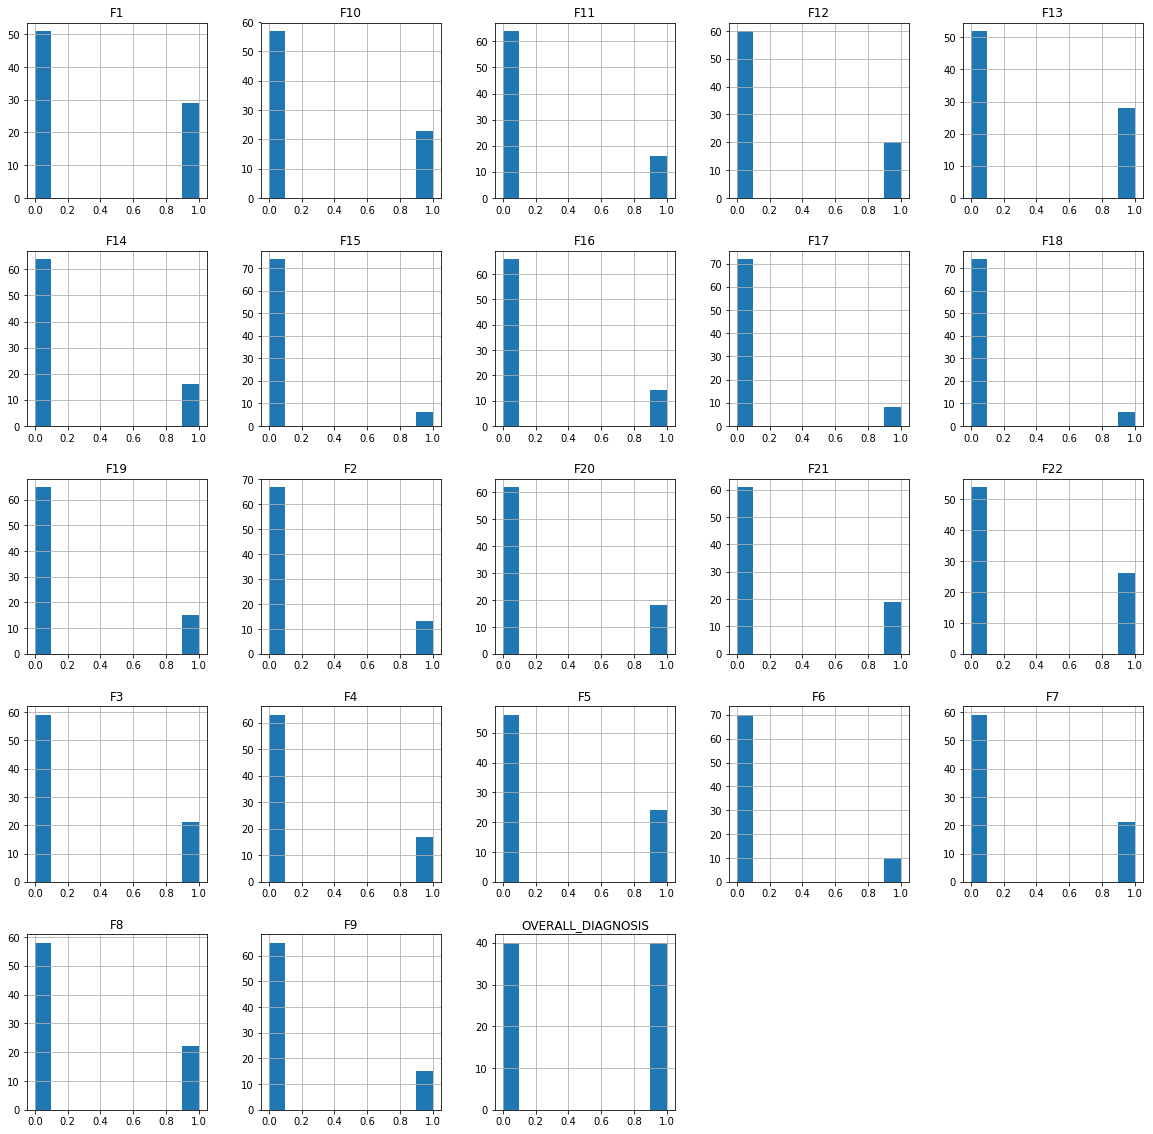

In [87]:
# Plotting histograms of each parameter 
data_train.hist(figsize = (20, 20))
plt.show()

In [88]:
# Determine number of cases where disease is present and not present

Present = data_train[data_train['OVERALL_DIAGNOSIS'] == 1]
Absent = data_train[data_train['OVERALL_DIAGNOSIS'] == 0]

outlier_fraction = len(Absent)/float(len(Present))
print(outlier_fraction)

print('Heart Disease Present Cases: {}'.format(len(data_train[data_train['OVERALL_DIAGNOSIS'] == 1])))
print('Heart Disease Absent Casess: {}'.format(len(data_train[data_train['OVERALL_DIAGNOSIS'] == 0])))


1.0
Heart Disease Present Cases: 40
Heart Disease Absent Casess: 40


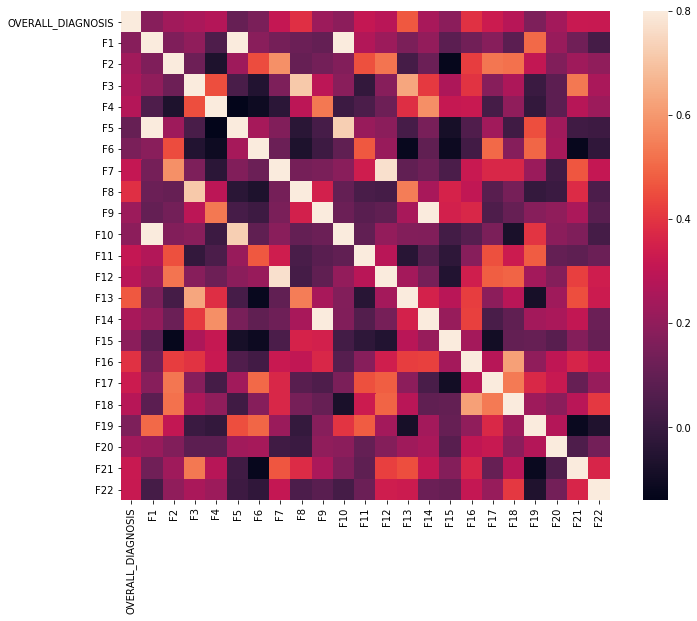

In [89]:
# Correlation matrix
corrmat = data_train.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [90]:
# Checking for null values within dataset

data_train.isnull().sum()

OVERALL_DIAGNOSIS    0
F1                   0
F2                   0
F3                   0
F4                   0
F5                   0
F6                   0
F7                   0
F8                   0
F9                   0
F10                  0
F11                  0
F12                  0
F13                  0
F14                  0
F15                  0
F16                  0
F17                  0
F18                  0
F19                  0
F20                  0
F21                  0
F22                  0
dtype: int64

In [93]:
# Seperating X (data) & Y (target)
x_train = data_train.iloc[:,1:].values
y_train = data_train.iloc[:,0].values
x_test = data_test.iloc[:,1:].values
y_test = data_test.iloc[:,0].values

In [94]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Applying The Random Forest Classifier on the train dataset
clf_forest = RandomForestClassifier(criterion="entropy", n_estimators=13, random_state=45, min_samples_split=.05)
clf_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.05,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

In [95]:
y_pred_rf = clf_forest.predict(x_test)

In [96]:
accuracy_score(y_test, y_pred_rf)

0.7914438502673797

In [97]:
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[ 12   3]
 [ 36 136]]
             precision    recall  f1-score   support

          0       0.25      0.80      0.38        15
          1       0.98      0.79      0.87       172

avg / total       0.92      0.79      0.84       187



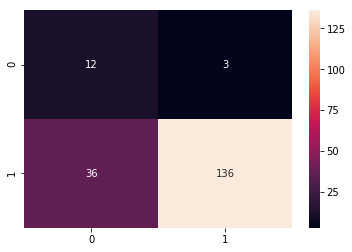

In [72]:
cm = pd.DataFrame(confusion_matrix)
sns.heatmap(cm,annot=True,fmt="d")

In [110]:
#Importing Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

#Applying the Knn Classifier on the dataset
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [111]:
y_pred_kn = classifier.predict(x_test)
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test,y_pred_kn)

0.7219251336898396

In [113]:
print(confusion_matrix(y_test,y_pred_kn))
print(classification_report(y_test, y_pred_kn))

[[ 14   1]
 [ 51 121]]
             precision    recall  f1-score   support

          0       0.22      0.93      0.35        15
          1       0.99      0.70      0.82       172

avg / total       0.93      0.72      0.79       187



In [103]:
# Finding the best value of K
error = []

for i in range(3,50,2):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(x_train,y_train)
    pred_y_test = Knn.predict(x_test)
    error.append(np.mean(pred_y_test != y_test))

Text(0,0.5,'Mean Value of Error')

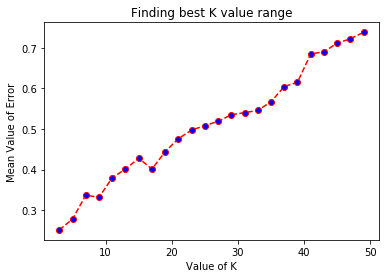

In [106]:
plt.plot(range(3,50,2),error,color="red", linestyle='dashed', marker="o",markerfacecolor='blue')
plt.title("Finding best K value range")
plt.xlabel("Value of K")
plt.ylabel("Mean Value of Error")

In [135]:
#Importing Support Vector Machine Package

from sklearn import svm

svc = svm.SVC(kernel='rbf',C=1,gamma=1).fit(x_train, y_train)

In [136]:
predicted = svc.predict(x_test)

In [137]:
accuracy_score(y_test,predicted)

0.8502673796791443

In [161]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test, predicted))

[[  8   7]
 [ 21 151]]
             precision    recall  f1-score   support

          0       0.28      0.53      0.36        15
          1       0.96      0.88      0.92       172

avg / total       0.90      0.85      0.87       187



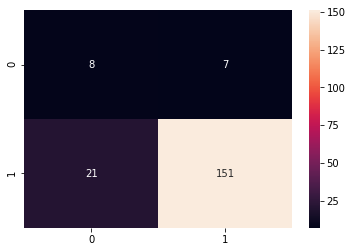

In [164]:
xdc = confusion_matrix(y_test,predicted)
cm = pd.DataFrame(xdc)
sns.heatmap(cm,annot=True,fmt="d")